# Solwing the Solow model with R&D

## Intro

In this project we will try to solve the solow model with R&D and furthermore extend the model by including human capital.

Our goal will be to dig into the following aspects:

* Finding the steady state rates by solveing for several transition equation
* Finding numeric values for the steady state rates
* Visualizing the transition towards steady state


The realistic parameters, which will be used to find a numeric value for the steady state rates can be found in the textbook "*Introducing Advanced Macroeconomics*" by Peter Birch Sørensen and Hans Jørgen Whitta-Jacobsen.

# Post peer feedback changes

* Improved both transition plots - More interactive features, made arrow follow the equilibrium etc.
* Some people have troubles running the plots - Theses errors should be fixed now
* Fixed typos and mislabels

### More Feedback ideas, which was taken into considerations but ultimately was not implemented

* Direction fields
* Calculating speed of convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import sympy as sm

sm.init_printing(use_unicode=True)

We consider the following model for a closed economy, where the following equations are given:

1. \\[Y_{t}=K_{t}^{\alpha}\left(A_{t}L_{Y_{t}}\right)^{1-\alpha}, 0<\alpha<1\\]
2. \\[K_{t+1}-K_{t}=s_{K}Y_{t}-\delta K_{t},0<\delta<1,0<s_{k}<1,K_{0}>0  \text{ provided} \\] 
3. \\[A_{t+1}-A_{t}=\rho A_{t}^{\phi}L_{A_{t}}^{\lambda},\rho>0,\phi>0,0<\lambda<1 \\]
4. \\[L_{A_{t}}=s_{R}L_{t},0<s_{R}<1 \\]
5. \\[L_{t}=L_{A_{t}}+L_{Y_{t}} \\]
6. \\[L_{t+1}=\left(1+n\right)L_{t},n>0 \\]


Equation (1) is a Cobb-Douglas production function, which describes the aggregated production, $Y_{t}$, as a function of financial capital, $K_{t}$, production workers, $L_{Y_{t}}$ and the knowledge level, $A_{t}$, which determines the productivity of the workers.

Equation (2) describes how financial capital develops over time, where $s_{K}$ is the saving rate.

Equation (3) shows the development in the knowledge level, where $A_{t}$ is an expression for the knowledge at the time $t$ and $L_{A_{t}}$ is the amount of researchers. Equation (4) shows that the latter is the product of the population, $L_{t}$, and the share of researchers, $s_{R}$.

The following definitions will also be used throughout this project:

7. \\[ y_{t}=\frac{Y_{t}}{L_{Y_{t}}};k_{t}=\frac{K_{t}}{L_{Y_{t}}} \\]
8. \\[\tilde{y}=\frac{y_{t}}{A_{t}};\tilde{k}=\frac{k_{t}}{A_{t}} \\]

Where **7.** is the definition for capital-labo ratio and **8.** is the definition for the technology adjusted capital-labor ratio.


# The growth in technology
Our first goal in this model is to find the steady state rate for the exact growth rate of technology.

The following transitions equation is given for the growth in technology:

9. \\[g_{t+1}=\left(1+n\right)^{\lambda}g_{t}\left(1+g_{t}\right)^{\phi-1}\\]

We then wish to find the steady state for this equation. That is to solve for $g^*$ the following equation:
10. \\[g^*=\left(1+n\right)^{\lambda}g^*\left(1+g^*\right)^{\phi-1}\\]

In [2]:
# Define parameters as symbols
g = sm.symbols('g')
n = sm.symbols('n')
l = sm.symbols('lambda')
phi = sm.symbols('phi')

In [3]:
# Define the transition equation
trans_g = sm.Eq(1,(1+n)**(l)*1*(1+g)**(phi-1))

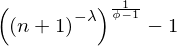

In [4]:
# Solve for g
ss_g = sm.solve(trans_g,g)[0]
ss_g

Next we will estimate the numeric value of the steady state growth rate of technology by using realistic parameters.
$n = 0.01$
$\lambda = 1$
$\phi = 0.50$


In [5]:
# Define function and print with given parameters
sol_func_g = sm.lambdify((n,l,phi),ss_g)
sol_num_g = sol_func_g(0.01,1,0.5)
f"The steady state growth rate of technology is {sol_num_g:.2f}"

'The steady state growth rate of technology is 0.02'

By using these given parameters, the steady state rate of growth in technology is estimated to be 2%.

# Solving the "simple" model with R&D

Our next step is to solve the simple model with R&D.
The transition equation for capital accumulation can then be expressed as:

11. \\[ {\tilde{k}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{k}\tilde{k}_{t}^{\alpha}+\left(1-\delta\right)\tilde{k}_{t}\right)} \\]



To find the solution for this model, we will have to find the steady state rate. That is to solve for $\tilde{k}$ in the following equation:

12. \\[{\tilde{k}^{*}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{k}\tilde{k}^{\alpha*}+\left(1-\delta\right)\tilde{k}^{*}\right)} \\]

But first, we will have to define the following parameters and variables as symbols

In [6]:
# Define variables and parameters as symbols 
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_k = sm.symbols('s_K')

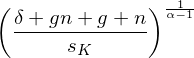

In [7]:
# Define equation and solve for k
trans_k = sm.Eq(k,(s_k*k**alpha+(1-delta)*k)/((1+n)*(1+g)))
ss_k = sm.solve(trans_k,k)[0]
ss_k

Let's try to find the numeric value for the steady state growth rate of capital per effecient worker by using realistic paramters:
$$s_K = 0.2$$ 
$$g = 0.02$$ 
$$n = 0.01$$
$$\delta = 0.06$$
$$\alpha = 1/3 $$

In [8]:
# Define function and print with parameters
sol_func_k = sm.lambdify((s_k,g,n,delta,alpha),ss_k)
sol_num_k = sol_func_k(0.2,0.02,0.01,0.06,1/3)
f"The Adjusted capital-labor ratio SS is {sol_num_k:.2f}"

'The Adjusted capital-labor ratio SS is 3.30'

We could also estimate the rate by changing some parameters and holding the others fixed. Hence, we create a slider

In [9]:
# Define function for the solution
def sol_num_k_func(s_k,g,n,delta,alpha):
    return f"The steady state growth rate of capital per effecient worker is {((delta + g * n + g + n)/s_k)**(1/(alpha-1)):.3f}"

In [10]:
# Create slider
slider_g_r = widgets.interact(sol_num_k_func,
    s_k=widgets.FloatSlider(description="$s_k$", min=0.0, max=0.5, step=0.05, value=0.2),
    g=widgets.FloatSlider(description="$g$", min=0.0, max=0.1, step=0.01, value=0.02),
    n=widgets.FloatSlider(description="$n$", min=0.0, max=0.1, step=0.01, value=0.01),
    delta=widgets.FloatSlider(description="$\delta$", min=0.0, max=0.2, step=0.02, value=0.06),
    alpha=widgets.FloatSlider(description="$a$", min=0.1, max=0.67, step=0.03, value=1/3)                      )


interactive(children=(FloatSlider(value=0.2, description='$s_k$', max=0.5, step=0.05), FloatSlider(value=0.02,…

## Visualization of the path towards steady state - The transition diagram
Our next goal is to create a plot for the transition diagram.

In [11]:
# Define functions of the transition equation and the numeric SS solutions.
def trans_k_func(k, s_k, alpha, delta, n, g):
    return (s_k*k**alpha+(1-delta)*k)/((1+n)*(1+g))
def sol_val_k_func(s_k,g,n,delta,alpha):
    return  ((delta + g * n + g + n)/s_k)**(1/(alpha-1))

## Changing the value of the savings ratio
What will happen to our plot, if the savaings ratio was to be changed. We will explore this by creating a simple interactive slider.

**Please run the below cell twice to resize the plot propely**

In [12]:
from ipywidgets import interactive

def slider(s_k):
    plt.figure(dpi = 100)
    plt.rc('text', usetex=True)
    plt.rc('font', family='sans-serif')
    
    #range for k
    k = np.arange(0.0, 15, 0.005)
    
    # paramters:
    s_K = 0.2 
    g = 0.02 
    n = 0.01
    delta = 0.06
    alpha = 1/3 
    
    # label and title
    plt.xlabel(r'$k_t$',fontsize=20 )
    plt.ylabel(r'$k_{t+1}$', fontsize=20)
    plt.title(r'The transition diagram', fontsize=20)

    # plot the transition equation and 45-degree equation
    plt.plot(k, trans_k_func(k, s_k, alpha, delta, n, g))
    plt.plot(k, k)
    
    sol_val_k = sol_val_k_func(
                                delta = delta, g = g, n = n, s_k = s_k, alpha = alpha)

    # Legend
    plt.legend((r'$\frac{1}{\left(1+n\right)\left(1+g\right)}\left(s\tilde{k}_{t}^{\alpha}+\left(1-\delta\right)\tilde{k}_{t}\right)$',
            r'$\tilde{k}_{t+1}=\tilde{k}_{t}$'),
           shadow=True, handlelength=1.4, fontsize=12)        
    
    # Create arrow, which points at SS
    plt.annotate( f'Adjusted capital-labor ratio SS {sol_val_k:.3f}',
                 xy=(sol_val_k, sol_val_k),
                 xytext=(sol_val_k-1, sol_val_k-3),
                arrowprops=dict(facecolor='black', shrink=0.01),
            )
    

# plot the figure and interactive slider
interactive_plot = interactive(slider, 
                               s_k=widgets.FloatSlider(description="$s_k$", 
                                                       min=0.0,
                                                       max=0.5,
                                                       step=0.04,
                                                       value=0.20,
                                                       continuous_update=True) 
                              )


interactive_plot

interactive(children=(FloatSlider(value=0.2, description='$s_k$', max=0.5, step=0.04), Output()), _dom_classes…

We see as the savings ratio increases, so does the steady state rate.

# Extending the model with human capital

We now want to extend the model and therefore adds *Human capital*.

Equation 1. will be swapped by:

1'. \\[Y_{t}=K_{t}^{\alpha}H_{t}^{\varphi}\left(A_{t}L_{Y_{t}}\right)^{1-\alpha-\varphi} \\]

And a new human capital accumulation equation is given as:

13. \\[H_{t+1}-H_{t}=s_{H}Y_{t}-\delta H_{t},0<\delta<1,0<s_{H}<1,H_{0}>0  \text{ provided} \\] 



which will change equation (1) and (3). Additionally the equation below will be added to the model, which describes how human capital develops over time. Here $s_{H}$ is the saving rate in human capital. $\delta$ is the depreciation rate.
The following is the definition of per production worker variable and per effective production worker variable: $h_{t}=\frac{H_{t}}{L_{Y_{y}}}$ &  $\tilde{h}=\frac{h_{t}}{A_{t}}$

With human capital included in the model, a new transition equation is given for human capital per effecient worker and capital per effecient worker.

14. \\[ \tilde{h}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{K}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{h}_{t}\right) \\]

15. \\[ \tilde{k}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{H}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{k}_{t}\right)\\]

Similar to the previous simple model, we will have to solve the following two equations to find the steady state values.
 
  \\[ \tilde{k}^{*}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{K}\tilde{k}^{*{\alpha}}\tilde{h}^{*{\varphi}}+\left(1-\delta\right)\tilde{k}^*\right)\\]
 
  \\[ \tilde{h}^{*}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{H}\tilde{k}^{*{\alpha}}\tilde{h}^{*{\varphi}}+\left(1-\delta\right)\tilde{h}^*\right)\\]
  

 


In [13]:
# Define parameters as symbols
h = sm.symbols('h')
k = sm.symbols('k')
s_h =sm.symbols('s_H')
s_k = sm.symbols('s_K')
g = sm.symbols('g')
n = sm.symbols('n')
delta = sm.symbols('delta')
vphi = sm.symbols('varphi')
alpha = sm.symbols('alpha')
vphi = sm.symbols('varphi')

In [14]:
# Define the two new transition equations
trans_k2 = sm.Eq(k,(s_k*k**alpha*h**vphi+(1-delta)*k)/((1+n)*(1+g)))
trans_h = sm.Eq(h,(s_h*k**alpha*h**vphi+(1-delta)*h)/((1+n)*(1+g)))

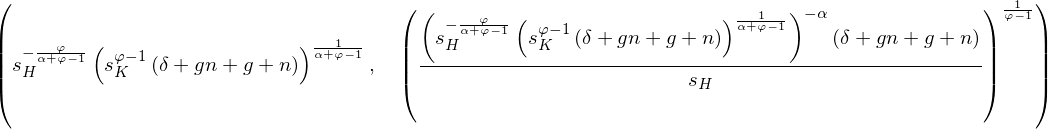

In [15]:
# Solve a system of two equations
ss_kh = sm.solve([trans_k2,trans_h], (k,h))[0]
ss_kh

While this might not be the most aesthetically pleasing solution, it is the correct.


Next we are able to find the steady state rate for GDP per effecient worker, $\tilde{y}^* = (\tilde{k})^\alpha*(\tilde{h})^\varphi $.

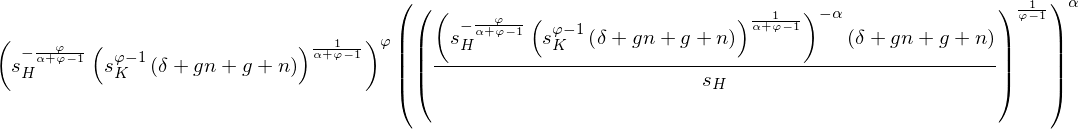

In [16]:
# Find the steady state rate for GDP per effecient worker
ss_gdp_per_worker = ss_kh[0]**vphi*ss_kh[1]**alpha
ss_gdp_per_worker

Next we will estimate the numeric value of the steady state rate of:

* Capital per effecient worker, $k^*$
* Human Capital per effecient worker, $h^*$
* GDP per effecient worker, $y^*$


by using the following paramters:
$$s_K = 0.2$$ 
$$s_H = 0.2$$ 
$$g = 0.02$$ 
$$n = 0.01$$
$$\delta = 0.06$$
$$\alpha = \varphi = 1/3 $$



In [17]:
# Define and insert parameters for capital
sol_func_k2 = sm.lambdify((s_k,s_h,g,n,delta,alpha,vphi),ss_kh[0])
sol_num_k2 = sol_func_k2(0.2,0.2,0.02,0.01,0.06,1/3,1/3)
f" The Adjusted capital-labor ratio SS is {sol_num_k2:.3f}"

' The Adjusted capital-labor ratio SS is 10.901'

In [18]:
# Define and insert parameters for human capital
sol_func_h = sm.lambdify((s_k,s_h,g,n,delta,alpha,vphi),ss_kh[1])
sol_num_h = sol_func_h(0.2,0.2,0.02,0.01,0.06,1/3,1/3)
f"The Adjusted human capital-labor ratio SS is {sol_num_h:.3f}"

'The Adjusted human capital-labor ratio SS is 10.901'

In [19]:
# Define and insert parameters for GDP 
sol_func_y = sm.lambdify((s_k,s_h,g,n,delta,alpha,vphi),ss_gdp_per_worker)
sol_num_y = sol_func_y(0.2,0.2,0.02,0.01,0.06,1/3,1/3)
f"The steady state rate for GDP pr. worker is {sol_num_y:.3f}"

'The steady state rate for GDP pr. worker is 4.916'

## Visualization of the path towards steady state - The transition diagram
Our next goal is to create a plot for the transition diagram for the model including human capital.
First we have to find the "nullclines". In order for us to this, we first have to find the solow equations. This is done by substracting $\tilde{k}_{t}$ or $\tilde{h}_{t}$ from the respective transition equation.

16. \\[ \tilde{h}_{t+1}-\tilde{h}_{t}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{K}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{h}_{t}\right)-\tilde{h}_{t} \\]

17. \\[ \tilde{k}_{t+1}-\tilde{k}_{t}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{H}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{k}_{t}\right)-\tilde{k}_{t} \\]

To find the nullclines, we will have to solve for $\tilde{h}$ in the two solow equations.

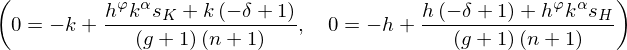

In [20]:
# Define the two solow equations
solow_k = sm.Eq(k-k,((s_k*k**alpha*h**vphi+(1-delta)*k)/((1+n)*(1+g))-k))
solow_h = sm.Eq(h-h,((s_h*k**alpha*h**vphi+(1-delta)*h)/((1+n)*(1+g))-h))
solow_k, solow_h

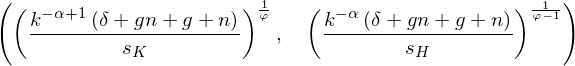

In [21]:
# Now solve for each of the equation with respect to h
solow_sol_k = sm.solve(solow_k, h)[0]
solow_sol_h = sm.solve(solow_h, h)[0]
solow_sol_k, solow_sol_h

The first nullcine is labed as ($\Delta\tilde{k}_{t} = 0)$ and the second nullcline as ($\Delta\tilde{h}_{t} = 0)$.

In [22]:
# Parameters
g = 0.02
n = 0.01
delta = 0.06
alpha = 1/3
vphi = 1/3


# Define the two null clines as functions
def nullcline_1(k, s_k, s_h, alpha, delta, n, g):
    return (((k**(-alpha+1)*(delta + g*n + g + n)) / s_k)**(1/vphi))
def nullcline_2(k, s_k, s_h, alpha, delta, n, g):
    return (((k**(-alpha)*(delta + g*n + g + n)) / s_h)**(1/(vphi-1)))

In [23]:
def slider2(s_k, s_h):
    # Range for k
    k = np.arange(0.0,80.0,0.1)
    
    plt.figure(dpi=100)
    
    # labels and title
    plt.xlabel(r'$\tilde{k_t}$',fontsize=20, color = "black" )
    plt.ylabel(r'$\tilde{h_t}$', fontsize=20, color = "black")
    plt.title(r'The transition diagram with human capital', fontsize=20)


    # Plot the nullclines
    plt.plot(k, nullcline_1(k, s_k, s_h, alpha, delta, n, g))
    plt.plot(k, nullcline_2(k, s_k, s_h, alpha, delta, n, g))

    # Calculate the numeric SS values
    sol_val_h = sol_func_h(s_k,s_h,g,n,delta,alpha,vphi)
    sol_val_k2 = sol_func_k2(s_k,s_h,g,n,delta,alpha,vphi)


    # Dashed lines for SS values
    plt.axhline(y=sol_val_h, xmin=0., xmax=1, linestyle = '--', color = "black")
    plt.axvline(x=sol_val_k2, ymin=0., ymax=1, linestyle = '--', color = "black")

    # Legend
    plt.legend((r'$\left[\Delta\tilde{k}_{t}=0\right]$',
                    r'$\left[\Delta\tilde{h}_{t}=0\right]$'),
                   shadow=True, handlelength=1.4, fontsize=16)

    # labels for dashed lines
    plt.annotate(r'$\tilde{k}^{*}$', xy=(0, 0), xytext=(sol_val_k2, -5))
    plt.annotate(r'$\tilde{h}^{*}$', xy=(0, 0), xytext=(-5, sol_val_h))
    plt.axis([0,80,0,80])
    plt.show()

# plot the figure and interactive slider for s_k and s_h
interactive_plot = interactive(slider2, 
                               s_k=widgets.FloatSlider(description="$s_k$", 
                                                       min=0.0,
                                                       max=0.4,
                                                       step=0.04,
                                                       value=0.20,
                                                       continuous_update=True),
                               s_h=widgets.FloatSlider(description="$s_h$", 
                                                       min=0.0,
                                                       max=0.4,
                                                       step=0.04,
                                                       value=0.20,
                                                       continuous_update=True)
                              )
                              
interactive_plot

interactive(children=(FloatSlider(value=0.2, description='$s_k$', max=0.4, step=0.04), FloatSlider(value=0.2, …

# Finding the steady state growth path for GDP per capita

Under the assumption that $\phi < 1 $, we'll try to derive the steady-state growth path for GDP per capita. \\[\hat{y}_{t}^{*}=\tilde{y}^{*}\left(1-s_{R}\right)\left(\frac{\rho}{g_{se}}\right)^{\frac{1}{1-\phi}}s_{R}^{\frac{\lambda}{1-\phi}}\left(1+g_{se}\right)^{t}L_{0}^{\frac{\lambda}{1-\phi}}\\]

In [24]:
# Define the following parameters as symbols
y_hat = sm.symbols('\hat{y}_{t}^{*}')
y_tilde = sm.symbols(r'\tilde{y}^{*}')
l = sm.symbols('lambda')
phi = sm.symbols('phi')
s_r = sm.symbols('s_{R}')
rho = sm.symbols('rho')
g_se = sm.symbols('g_{se}')
t = sm.symbols('t')
L_0 = sm.symbols('L_{0}')

In [25]:
# Defining the equation
ss_gp = y_tilde*(1-s_r)*(rho/g_se)**(1/(1-phi))*s_r**(l/(1-phi))*(1+g_se)**t*L_0**(l/(1-phi))

Next we will find the "Golden rule" for $s_R$, which is the optimal share of the population being researchers. This is done by differentiation with respect to $s_R$,$\frac{\partial\hat{y}_{t}^{*}}{\partial s_{R}}$,  and then solving for $s_R$.

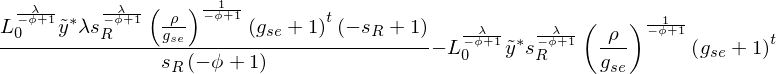

In [26]:
# Differentiate the equation with respect to s_R
diff_ss_gp = sm.diff(ss_gp,s_r)
diff_ss_gp

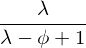

In [27]:
#Solve for s_R
golden_rule = sm.solve(diff_ss_gp,s_r)[0]
golden_rule

As presented above, the optimal share of researchers is $\left[\frac{\lambda}{\lambda-\phi+1}\right]$. Next let's try to find the numerical value by using the following realistic parameters. $\lambda = 1, \phi = 0.5$

In [28]:
# parametrize the golden rule
golden_rule_num = sm.lambdify((l,phi),golden_rule)
g_r = golden_rule_num(1,0.5)
f"The optimal share of researchers are {g_r:.3f}"

'The optimal share of researchers are 0.667'

Last, let's create a simple slider for changing values of $\phi$ while holding $\lambda$ fixed.

In [29]:
# Define function of the golden rule
def g_rule(l,phi):
    return f"s_r = {l/(1+l-phi):.3f}"

In [30]:
# Create slider
slider_g_r = widgets.interact(g_rule,
    phi=widgets.FloatSlider(description="$\phi$", min=0.0, max=1.0, step=0.05, value=0.5),
    l=widgets.fixed(1)
                       )

interactive(children=(FloatSlider(value=0.5, description='$\\phi$', max=1.0, step=0.05), Output()), _dom_class…

We see as $\phi$, which is a messaure for how capital affects "knowledge",  continues to grow the optimal share of researchers also increases.

# Overall conclusion and further perspectives

In this project, we have succeded in solving the solow model with R&D and extended it with human capital. The dynamic paths towards steady state have been visualized by using realistic parameters. We have also seen how the steady state rate develops, when some of the parameters are changed.

To extend this project more simulations and visualization are posible options. 